# Tiling the bathroom

_Combinatorial Optimization course, FEE CTU in Prague. Created by [Industrial Informatics Department](http://industrialinformatics.fel.cvut.cz)._

## Motivation

You accidentally dropped a bowling ball in your bathroom, which cracked a significant part of the floor. You successfully removed the debris, but now you must fill the resulting rectangular hole with new tiles. However, the tiles are pretty costly, so you asked the neighbors whether they have any spares. Finally, you acquired several different rectangular tiles whose area is equal to the area of the hole. Are you able to repair the floor?

## Input

You are given the following:

* Rectangle hole in your bathroom of dimensions $A_x,A_y$
* $n$ different square tiles described by their size $a_i$

For the experiments, you may use the following instance:

In [226]:
A_x, A_y = 33, 32
a = [1, 4, 7, 8, 9, 10, 14, 15, 18]
# A_x, A_y = 5, 10
# a = [5, 5]
n = len(a)

A_sq = A_x * A_y
A = A_x * A_y
tiles_sq = sum(a[i] * a[i] for i in range(n))
A_sq, tiles_sq

print(f"Total area: {A_sq}, tiles area: {tiles_sq}")

Total area: 1056, tiles area: 1056


## Output

You should find a positions of the bottom-left corners of the tiles so you fill the entire hole in your bathroom.

## Exercise

Implement the ILP model of the problem.

In [229]:
import gurobipy as g  # import Gurobi module


# model --------------------------------------------------
model = g.Model()
model.Params.DualReductions = 0
xs = model.addVars(n, lb=0, ub=A_x, vtype=g.GRB.INTEGER)
ys = model.addVars(n, lb=0, ub=A_y, vtype=g.GRB.INTEGER)
c = model.addVars(n, n, vtype=g.GRB.BINARY)
gs = model.addVars(n, n, vtype=g.GRB.BINARY)

M = A_x * A_y
M_inv = 1 / M

for i in range(n):
    for j in range(n):
        model.addConstr(xs[i] + a[i] <= A_x)
        model.addConstr(ys[i] + a[i] <= A_y)
        if i != j:
            model.addConstr(gs[i, j] <= 1 + M_inv * xs[j] - M_inv * xs[i] - M_inv * a[i] + 1 / (M**2))
            model.addConstr(c[i, j] == 1 - c[j, i])
            model.addConstr(ys[j] - ys[i] - a[i] + (1 - c[i, j]) * M + gs[i, j] * M >= 0)
            model.addConstr(ys[i] - ys[j] - a[j] + c[i, j] * M + gs[j, i] * M >= 0)
            model.addConstr(ys[j] + a[j] - ys[i] + (1 - c[i, j]) * M + gs[i, j] * M >= 0)
            model.addConstr(ys[i] + a[i] - ys[j] + c[i, j] * M + gs[j, i] * M >= 0)


# model.setObjective(g.quicksum(c), sense=g.GRB.MAXIMIZE)
# model.setObjective(0)

model.optimize()

positions = [(0,0) for i in range(n)]
for i in range(n):
    positions[i] = (round(xs[i].x), round(ys[i].x))

Set parameter DualReductions to value 0
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 594 rows, 180 columns and 1674 nonzeros
Model fingerprint: 0x478063c8
Variable types: 0 continuous, 180 integer (162 binary)
Coefficient statistics:
  Matrix range     [9e-04, 1e+03]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 3e+01]
  RHS range        [1e+00, 1e+03]
Presolve removed 454 rows and 40 columns
Presolve time: 0.00s
Presolved: 140 rows, 140 columns, 490 nonzeros
Variable types: 0 continuous, 140 integer (124 binary)
Found heuristic solution: objective 0.0000000

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.0000000000

In [230]:
for i in range(n):
    for j in range(n):
        # print(ys[j].x - ys[i].x - a[i] + (1 - c[i, j].x) * M + gs[i, j].x * M >= 0)
        print(c[i, j].x, end=', ')
    print()
print([xs[i].x for i in range(n)])
print(positions)

-0.0, -0.0, -0.0, -0.0, 1.0, 1.0, 1.0, -0.0, -0.0, 
1.0, -0.0, -0.0, -0.0, 1.0, 1.0, 1.0, -0.0, -0.0, 
1.0, 1.0, -0.0, -0.0, 1.0, 1.0, 1.0, -0.0, 1.0, 
1.0, 1.0, 1.0, -0.0, 1.0, 1.0, 1.0, -0.0, 1.0, 
0.0, 0.0, 0.0, 0.0, -0.0, 1.0, 1.0, -0.0, -0.0, 
0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 1.0, -0.0, -0.0, 
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 
1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.0, 1.0, 
1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, -0.0, 
[8.0, 15.0, 8.0, -0.0, -0.0, 9.0, 19.0, 0.0, 15.0]
[(8, 22), (15, 18), (8, 15), (0, 15), (0, 23), (9, 22), (19, 18), (0, 0), (15, 0)]


## Visualisation

 

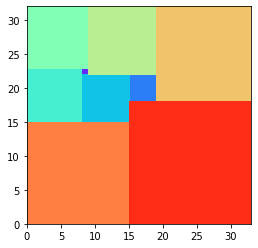

In [231]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.cm as cm

fig, ax = plt.subplots()

ax.set_xlim((0, A_x))
ax.set_ylim((0, A_y))
ax.set_aspect("equal")

# positions in form of (x, y)
for i in range(n):
    ax.add_patch(Rectangle(positions[i], a[i], a[i], color=cm.rainbow((i + 0.5)/n)))

plt.show()